In [3]:
# 處理大量圖片
import glob
import pandas as pd
df = pd.DataFrame(columns=["path", "target"])
fn = glob.glob("train/cat.*.jpg")
for f in fn:
    s = pd.Series([f, 0], index=["path", "target"])
    df = df.append(s, ignore_index=True)
    
fn = glob.glob("train/dog.*.jpg")
for f in fn:
    s = pd.Series([f, 1], index=["path", "target"])
    df = df.append(s, ignore_index=True)

df


,path,target
0,./train\cat.0.jpg,0
1,./train\cat.1.jpg,0
2,./train\cat.10.jpg,0
3,./train\cat.100.jpg,0
4,./train\cat.1000.jpg,0
5,./train\cat.10000.jpg,0
6,./train\cat.10001.jpg,0
7,./train\cat.10002.jpg,0
8,./train\cat.10003.jpg,0
9,./train\cat.10004.jpg,0


0: 貓 , 1: 狗 0
大小 :  (341, 415)


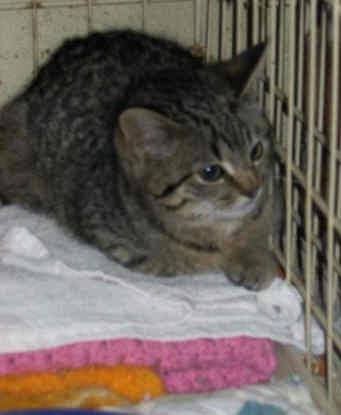

In [8]:
 
# pillow
from PIL import Image
import random
c = random.randint(0,24999)
data = df.iloc[c]
print("0: 貓 , 1: 狗",data["target"])
img = Image.open(data["path"])


print("大小 : ", img.size)
img



In [46]:
from keras.applications.vgg16 import VGG16


vgg = VGG16(include_top=False, input_shape=(224,224,3))

vgg.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [47]:
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
# !!!!!!!!!!!!!!!!!!!!!!
x = BatchNormalization()(vgg.output)
x = Flatten()(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
# x = Dense(1, activation="sigmoid")(x)
x = Dense(2, activation="softmax")(x)
cnn = Model(input=vgg.input, output=x)

# !!!!!!!!!!!
for l in vgg.layers:
    l.trainable = False

cnn.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

C:\Users\Big data\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [48]:
# 若用二元分類 使用 binary_crossentropy
cnn.compile(loss="categorical_crossentropy",
           optimizer="adam",
           metrics=["accuracy"])


In [49]:
import numpy as np
# 傳進去訓練前 都轉換成 numpy array
from keras.utils.np_utils import to_categorical



x_np = np.array(df["path"])
y_np = np.array(df["target"])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [53]:
# numpy random 不同於 range 本身不包含第二個數字
from keras.applications.vgg16 import preprocess_input
# 使用對方的 model 要使用對方的預處理
batch = 20
train_count = 5
for times in range(train_count):
    idx = np.random.randint(0, x_train.shape[0], 20)
    x = []
    for f in x_train[idx]:
        img = np.array(Image.open(f).resize((224,224)))
        img = preprocess_input(img)
        x.append(img)
    y = y_train_cat[idx]    
    x = np.array(x)
    loss = cnn.train_on_batch(x, y)
    print("-" * 10, "Train", times, "-" * 10)
    print(loss)
        
        

---------- Train 0 ----------
[0.9427454, 0.9]
---------- Train 1 ----------
[0.80590475, 0.95]
---------- Train 2 ----------
[1.6315286, 0.85]
---------- Train 3 ----------
[1.8727936, 0.85]
---------- Train 4 ----------
[0.019929785, 1.0]


In [72]:
idx = np.random.randint(0, x_test.shape[0], 50)
x = []
for f in x_test[idx]:
    img = np.array(Image.open(f).resize((224,224)))
    img = preprocess_input(img)
    x.append(img)
y = y_test_cat[idx]   
y_ori = y_test[idx]
x = np.array(x)
cnn.evaluate(x, y)

50/50 [==============================] - 13s 260ms/step


[0.3190108251571655, 0.9599999904632568]

In [73]:
# 無 predict_class 的作法
# 先predict
# 用 argmax(axis = -1)

ans = cnn.predict(x)
ans.argmax()

1

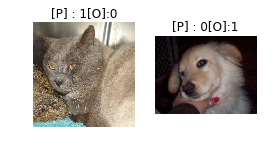

In [74]:
from matplotlib import pyplot as plt
%matplotlib inline
# enumerate 用法
notimg = []
notp = []
notori = []
plt.figure(figsize=(4,10))
for (i,a) in enumerate(ans.argmax(axis=-1)):
    if not a == y_ori[i]:
        notp.append(a)
        notori.append(y_ori[i])
        notimg.append(Image.open(x_test[i]))
        
        
# 畫出全部
for (i,img) in enumerate(notimg):
    plt.subplot(1, len(notimg), i + 1)
    plt.axis("off")
    plt.title("[P] : " + str(notp[i]) + "[O]:" + str(notori[i]))
    plt.imshow(img)
    
    